# Data preprocessing

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
dataset_no_shift = pd.read_csv('Better data 2019_2020.csv')
dataset_1_shift = pd.read_csv('Better data 2019_2020 shift_1.csv')
dataset_2_shift = pd.read_csv('Better data 2019_2020 shift_2.csv')

#### Identifying features

In [28]:
X_no = dataset_no_shift.iloc[:, 1:-1].values # Features (all columns except the first and the last)
y_no = dataset_no_shift.iloc[:, -1].values # Dependent var (last column)
X_1 = dataset_1_shift.iloc[:, 1:-1].values
y_1 = dataset_1_shift.iloc[:, -1].values
X_2 = dataset_2_shift.iloc[:, 1:-1].values
y_2 = dataset_2_shift.iloc[:, -1].values

#### Seeing the correlations

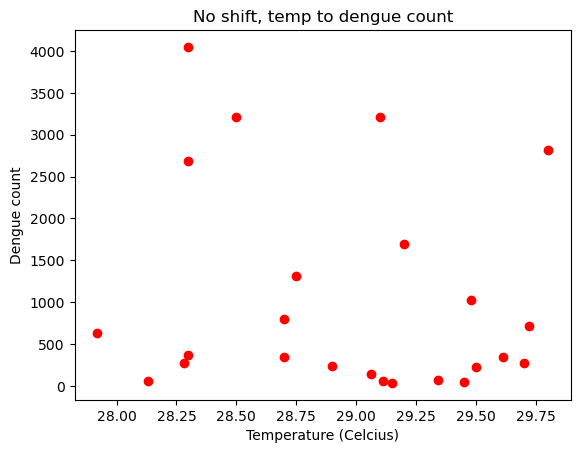

In [29]:
plt.figure()
plt.scatter(dataset_no_shift["Temp"], dataset_no_shift["Dengue_count"], c="red")
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Dengue count")
plt.title("No shift, temp to dengue count")
plt.show()

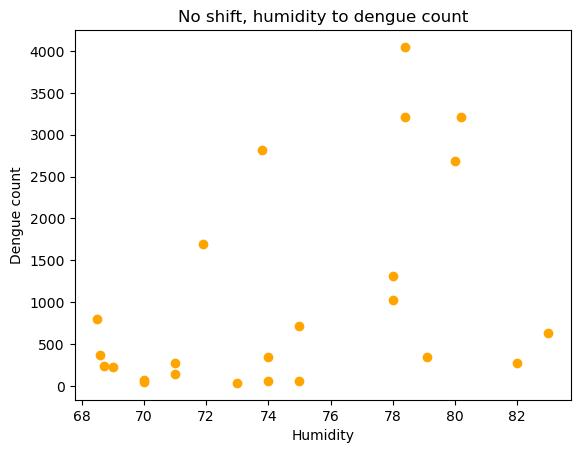

In [30]:
plt.figure()
plt.scatter(dataset_no_shift["Humidity"], dataset_no_shift["Dengue_count"], c="orange")
plt.xlabel("Humidity")
plt.ylabel("Dengue count")
plt.title("No shift, humidity to dengue count")
plt.show()

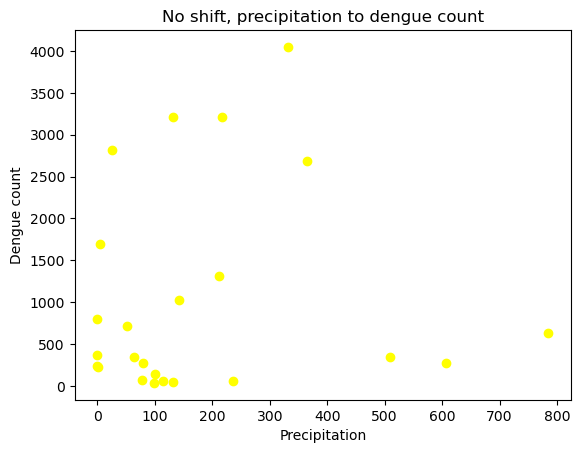

In [31]:
plt.figure()
plt.scatter(dataset_no_shift["Precipitation"], dataset_no_shift["Dengue_count"], c="yellow")
plt.xlabel("Precipitation")
plt.ylabel("Dengue count")
plt.title("No shift, precipitation to dengue count")
plt.show()

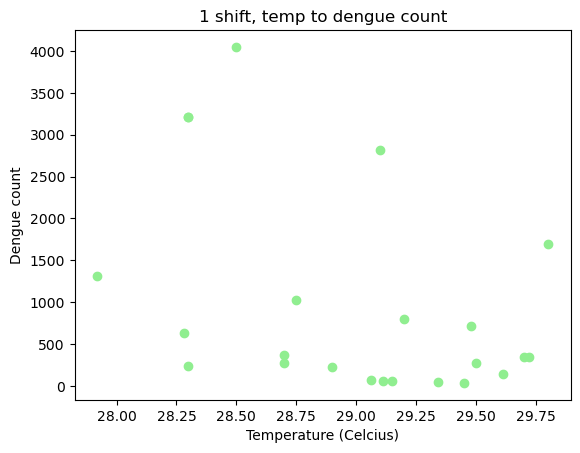

In [32]:
plt.figure()
plt.scatter(dataset_1_shift["Temp"], dataset_1_shift["Dengue_count"], c="lightgreen")
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Dengue count")
plt.title("1 shift, temp to dengue count")
plt.show()

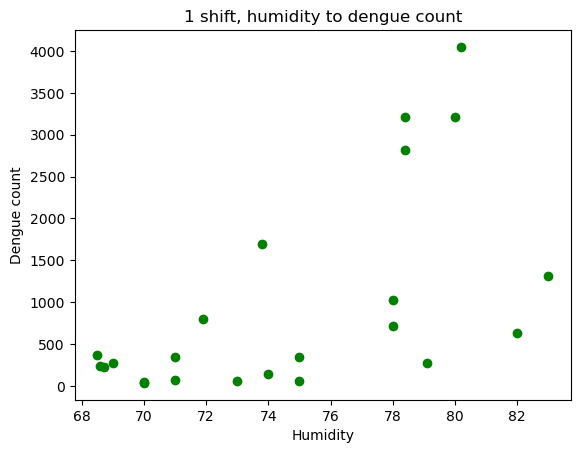

In [33]:
plt.figure()
plt.scatter(dataset_1_shift["Humidity"], dataset_1_shift["Dengue_count"], c="green")
plt.xlabel("Humidity")
plt.ylabel("Dengue count")
plt.title("1 shift, humidity to dengue count")
plt.show()

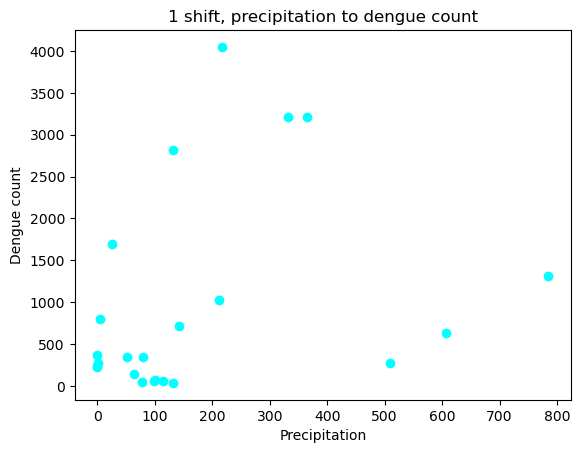

In [39]:
plt.figure()
plt.scatter(dataset_1_shift["Precipitation"], dataset_1_shift["Dengue_count"], c="cyan")
plt.xlabel("Precipitation")
plt.ylabel("Dengue count")
plt.title("1 shift, precipitation to dengue count")
plt.show()

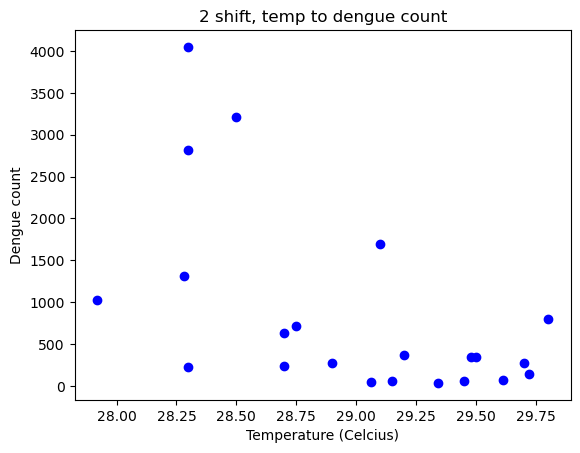

In [37]:
plt.figure()
plt.scatter(dataset_2_shift["Temp"], dataset_2_shift["Dengue_count"], c="blue")
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Dengue count")
plt.title("2 shift, temp to dengue count")
plt.show()

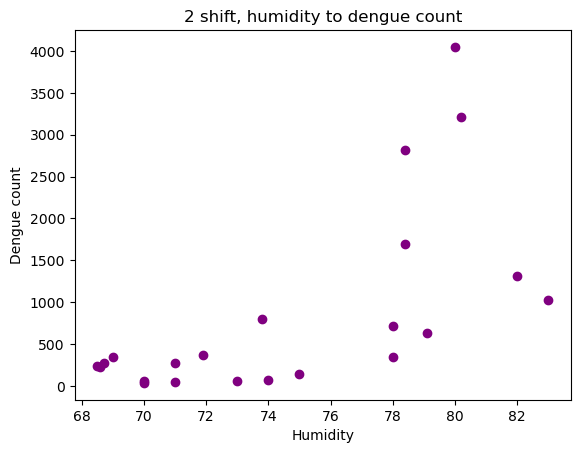

In [38]:
plt.figure()
plt.scatter(dataset_2_shift["Humidity"], dataset_2_shift["Dengue_count"], c="purple")
plt.xlabel("Humidity")
plt.ylabel("Dengue count")
plt.title("2 shift, humidity to dengue count")
plt.show()

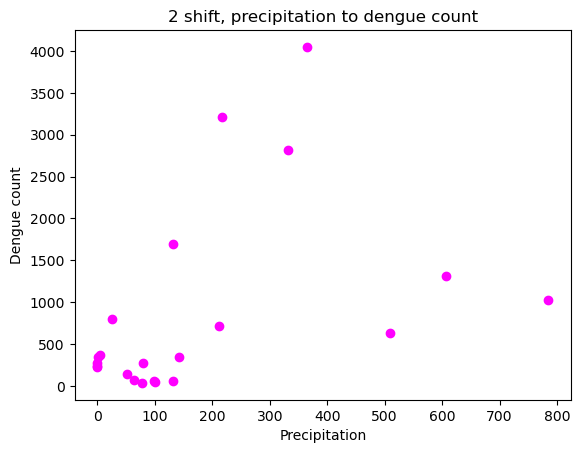

In [40]:
plt.figure()
plt.scatter(dataset_2_shift["Precipitation"], dataset_2_shift["Dengue_count"], c="magenta")
plt.xlabel("Precipitation")
plt.ylabel("Dengue count")
plt.title("2 shift, precipitation to dengue count")
plt.show()

#### Splitting into training and test data

In [4]:
from sklearn.model_selection import train_test_split
X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(X_no, y_no, test_size = 0.2, random_state = 1)
X_1_train,  X_1_test,  y_1_train,  y_1_test  = train_test_split(X_1,  y_1,  test_size = 0.2, random_state = 1)
X_2_train,  X_2_test,  y_2_train,  y_2_test  = train_test_split(X_2,  y_2,  test_size = 0.2, random_state = 1)

# No shift

## Multiple linear regression

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_no_train, y_no_train)

LinearRegression()

In [6]:
y_no_pred = regressor.predict(X_no_test)

In [7]:
np.set_printoptions(precision=2)
print(np.concatenate((y_no_pred.reshape(len(y_no_pred),1), y_no_test.reshape(len(y_no_test),1)), axis=1)) 

[[ 374.37  628.  ]
 [ 251.7   140.  ]
 [2486.03 3207.  ]
 [2093.85 1310.  ]
 [-667.43   50.  ]]


#### Performance

In [8]:
from sklearn.metrics import r2_score
r2_score(y_no_test, y_no_pred)

0.7433841512191585

## Polynomial regression (???)

In [ ]:
# degree = 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

In [ ]:
y_no_pred = regressor.predict(X_no_test)

## Support vector regression (SVR): RBF

#### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Decision tree regression

## Random forest regression

# Shift by one month

## Multiple linear regression

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_1_train, y_1_train)

LinearRegression()

In [10]:
y_1_pred = regressor.predict(X_1_test)

In [11]:
np.set_printoptions(precision=2)
print(np.concatenate((y_1_pred.reshape(len(y_1_pred),1), y_1_test.reshape(len(y_1_test),1)), axis=1)) 

[[-904.57   36.  ]
 [ 652.68  140.  ]
 [2258.33 2821.  ]
 [ 919.67 1310.  ]
 [-413.93   50.  ]]


#### Performance

In [12]:
from sklearn.metrics import r2_score
r2_score(y_1_test, y_1_pred)

0.6895854748983621

# Shift by two months